In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [4]:
# the data is only 2D
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656

2022-03-14 16:42:53.436792: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5240 - accuracy: 0.8062 - val_loss: 0.3997 - val_accuracy: 0.8473
Epoch 2/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3634 - accuracy: 0.8633 - val_loss: 0.3856 - val_accuracy: 0.8512
Epoch 3/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3125 - accuracy: 0.8813 - val_loss: 0.3103 - val_accuracy: 0.8831
Epoch 4/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2800 - accuracy: 0.8946 - val_loss: 0.3089 - val_accuracy: 0.8872
Epoch 5/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2547 - accuracy: 0.9037 - val_loss: 0.2880 - val_accuracy: 0.8913
Epoch 6/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2334 - accuracy: 0.9119 - val_loss: 0.2936 - val_accuracy: 0.8954
Epoch 7/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2171 - accuracy: 0.9179 - val_loss: 0.3055 -

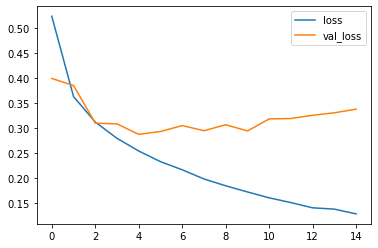

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

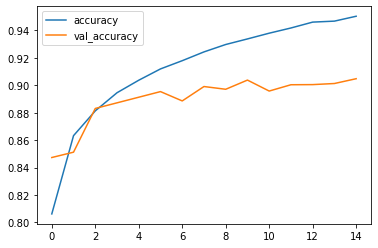

In [10]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Consusion matrix, without normalization
[[871   0  14  14   1   1  88   0  11   0]
 [  0 978   3  13   2   0   1   0   3   0]
 [ 19   1 847  12  46   0  72   0   3   0]
 [ 13   4  17 906  34   0  24   0   2   0]
 [  1   0  47  25 863   0  60   0   4   0]
 [  1   0   0   0   0 987   0   7   0   5]
 [108   0  57  28  90   0 701   0  16   0]
 [  0   0   0   0   0  14   0 963   0  23]
 [  3   0   4   5   2   2   6   3 975   0]
 [  0   0   0   0   0   7   1  35   0 957]]


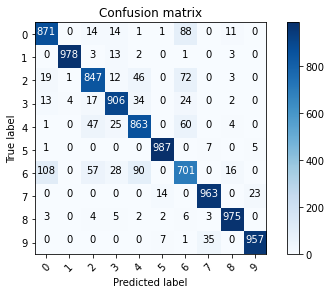

In [11]:
from sklearn.metrics import confusion_matrix
import itertools
def plt_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  '''
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('normalized confusion matrix')
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt_confusion_matrix(cm, list(range(10)))


In [12]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Pullover, Predicted: Shirt')

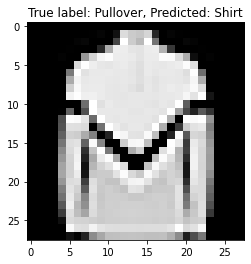

In [24]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))